In [3]:
import matplotlib.pyplot as plt
plt.style.use('default')
import numpy as np

# A Lua da Lua

## Exercício 1: A Terra gira em torno do Sol

O código abaixo tenta desenhar a órbita da Terra ao redor do Sol, assumindo que a órbita é circular (na verdade, ela é elíptica, mas queremos simplificar nossas contas para este exercício).

A função `pos_terra` recebe como entrada o raio da órbita terrestre, a velocidade angular da órbita, e um dia específico. Como essa função funciona, e o que ela retorna?

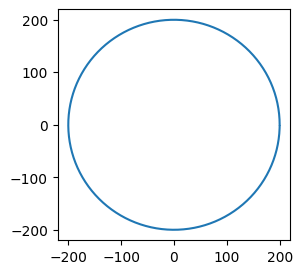

In [5]:
R_terra = 200  #raio da terra
v_terra = 1/365  #velocidade angular da terra

def pos_terra(R_terra, v_terra, dia):
    #posição x = ao raio da terra vezes o cosseno de 2*pi*(aonde ele está na volta)
    #posição y = ao raio da terra vezes o seno de 2*pi*(aonde ele está na volta)
    return R_terra * np.cos(2*np.pi*dia*v_terra), R_terra * np.sin(2*np.pi*dia*v_terra)

posicoes_x = []
posicoes_y = []
for d in range(365):
    x, y = pos_terra(R_terra, v_terra, d)
    posicoes_x.append(x)
    posicoes_y.append(y)

plt.figure(figsize=(3,3))
plt.plot(posicoes_x, posicoes_y)
plt.show()

## Exercício 2: A Lua gira em torno da Terra

A função `pos_lua` funciona da mesma forma que a função `pos_terra`. Por que os parâmetros `R_lua` e `v_lua` são diferentes de `R_terra` e `v_terra`?


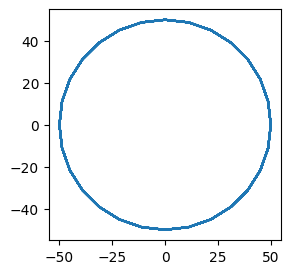

In [11]:
R_lua = 100
v_lua = 1/28

def pos_lua(R_lua, v_lua, dia):
    return R_lua * np.cos(2*np.pi*dia*v_lua), R_lua * np.sin(2*np.pi*dia*v_lua)

posicoes_x_lua = []
posicoes_y_lua = []
for d in range(365):
    x, y = pos_lua(R_lua, v_lua, d)
    posicoes_x_lua.append(x)
    posicoes_y_lua.append(y)

plt.figure(figsize=(3,3))
plt.plot(posicoes_x_lua, posicoes_y_lua)
plt.show()

## Exercício 3: A Lua forma um desenho diferente em torno do Sol

O código abaixo desenha a trajetória da Lua assumindo que o Sol está no centro do nosso sistema.

1. Como esse código funciona?
2. Por que esse desenho diferente aparece?

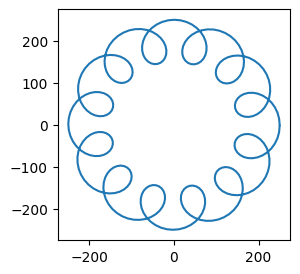

In [12]:
x_lua_sol = []
y_lua_sol = []
for i in range(len(posicoes_x)):
    xls = posicoes_x[i] + posicoes_x_lua[i]
    x_lua_sol.append(xls)
    yls = posicoes_y[i] + posicoes_y_lua[i]
    y_lua_sol.append(yls)


plt.figure(figsize=(3,3))
plt.plot(x_lua_sol, y_lua_sol)
plt.show()

## Exercício 4: e se a Lua tivesse uma "sub-lua"?

Imagine que há algum outro objeto que está orbitando ao redor da Lua em uma órbita circular.

Faça um código que permita visualizar a trajetória desse objeto assumindo o Sol como o centro do sistema.

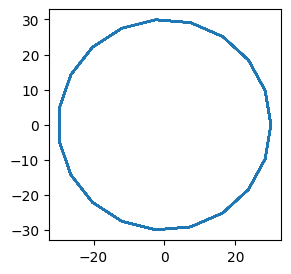

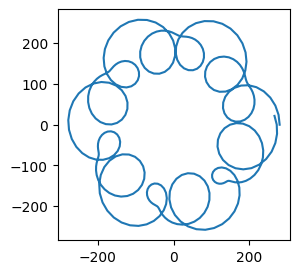

In [32]:
R_sublua = 30
v_sublua = 1/19

def pos_sublua(R_sublua, v_sublua, dia):
    return R_sublua * np.cos(2*np.pi*dia*v_sublua), R_sublua * np.sin(2*np.pi*dia*v_sublua)

posicoes_x_sublua = []
posicoes_y_sublua = []
for d in range(365):
    x, y = pos_sublua(R_sublua, v_sublua, d)
    posicoes_x_sublua.append(x)
    posicoes_y_sublua.append(y)

plt.figure(figsize=(3,3))
plt.plot(posicoes_x_sublua, posicoes_y_sublua)
plt.show()

x_sublua_sol = []
y_sublua_sol = []
for i in range(len(posicoes_x)):
    xls =  posicoes_x_lua[i] + posicoes_x_sublua[i] + posicoes_x[i]
    x_sublua_sol.append(xls)
    yls = posicoes_y_lua[i] + posicoes_y_sublua[i] + posicoes_y[i]
    y_sublua_sol.append(yls)


plt.figure(figsize=(3,3))
plt.plot(x_sublua_sol, y_sublua_sol)
plt.show()

## Exercício 5: Visualização

Altere o código abaixo para adicinar a sub-lua à simulação e ver a sua trajetória em relação à Lua e à Terra.

In [6]:
import pygame
import numpy as np

# Inicializa o Pygame
pygame.init()

# Constantes
WIDTH, HEIGHT = 800, 800
FPS = 20

x_sol = 400
y_sol = 400
R_terra = 200
v_terra = 1/365
R_lua = 100
v_lua = 1/28

# Cria a janela
screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("Earth Orbit Simulation")
clock = pygame.time.Clock()

def pos_terra(R_terra, v_terra, dia):
    return R_terra * np.cos(2 * np.pi * dia * v_terra), R_terra * np.sin(2 * np.pi * dia * v_terra)

def pos_lua(R_lua, v_lua, dia):
    return R_lua * np.cos(2 * np.pi * dia * v_lua), R_lua * np.sin(2 * np.pi * dia * v_lua)

def main():
    running = True
    dia = 0  # Representa o dia da simulação

    while running:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False

        # Posição da Terra
        x, y = pos_terra(R_terra, v_terra, dia)

        # Posição da Lua
        x_lua, y_lua = pos_lua(R_lua, v_lua, dia)
        x_lua += x
        y_lua += y

        dia += 1

        # Desenha na tela
        screen.fill((0, 0, 0))  # Limpa a tela
        pygame.draw.circle(screen, (0, 0, 255), (int(x_sol + x), int(y_sol + y)), 20)  # Desenha a Terra
        pygame.draw.circle(screen, (255, 255, 255), (int(x_sol + x_lua), int(y_sol + y_lua)), 5) # Desenha a Lua

        pygame.display.flip()  # Atualiza a tela
        clock.tick(FPS)

    pygame.quit()

if __name__ == "__main__":
    main()


pygame 2.5.2 (SDL 2.28.3, Python 3.11.6)
Hello from the pygame community. https://www.pygame.org/contribute.html
